### **📊4Cycle**

In [1]:
# 이상치를 제거한 후 차원축소 (정규화를 한 것 보다 안한게 더 결과가 좋음)

In [2]:
import pandas as pd

u_df = pd.read_csv("./datasets/USA Residential Building Energy Consumption.csv")

In [3]:
columns = u_df.columns[u_df.isna().any()]
for column in columns:
    pre_u4_df = u_df[~u_df[column].isna()]

In [4]:
pre_u4_df = pre_u4_df.drop(labels=['DOEID'], axis=1).reset_index(drop=True)

In [5]:
from sklearn.preprocessing import LabelEncoder

# 문자열 컬럼 추출
columns = ['METROMICRO', 'UATYP10', 'CLIMATE_REGION_PUB', 'IECC_CLIMATE_PUB']

label_encoders = {}

# 컬럼 반복하여 column에 담아 적용:
for column in columns:
    # LabelEncoder 객체 생성, 문자열 데이터 인코딩을 통해 정수로 형변환 후 데이터 교체
    encoder = LabelEncoder()
    # LabelEncoder를 사용하여 각 컬럼의 값을 변환
    result = encoder.fit_transform(pre_u4_df[column])
    # 변환된 값의 클래스(고유한 값) 저장
    label_encoders[column] = encoder.classes_
    # 변환된 값 적용
    pre_u4_df[column] = result

In [6]:
# 타겟 데이터 지정하고 원래 컬럼 삭제하기
pre_u4_df['target'] = pre_u4_df['KWH']
pre_u4_df = pre_u4_df.drop(labels=['KWH'], axis=1)

In [7]:
from sklearn.preprocessing import StandardScaler

# 타겟 데이터를 제외하고 정규화
std = StandardScaler()
result = std.fit_transform(pre_u4_df.iloc[:, :-1])
std_pre_u_df = pd.DataFrame(result, columns=pre_u4_df.iloc[:, :-1].columns)
std_pre_u_df

,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,ZBASEFIN,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
0,1.163594,1.389794,-0.320065,0.456688,-0.546992,0.0,0.071649,0.518416,-0.732019,-0.748170,...,-0.33702,0.728182,-0.487043,-0.474410,-2.842171e-14,-0.118107,-0.120134,-2.842171e-14,-0.086433,-0.08694
1,0.221773,0.067153,-0.320065,0.456688,-0.546992,0.0,0.971753,0.518416,1.577266,1.308364,...,-0.33702,0.011523,-0.487043,-0.474410,-2.842171e-14,-0.118107,-0.120134,-2.842171e-14,-0.086433,-0.08694
2,-1.661869,-1.255488,-0.320065,0.456688,-0.546992,0.0,0.971753,0.518416,0.807504,1.308364,...,-0.33702,0.617753,-0.487043,-0.474410,-2.842171e-14,-0.118107,-0.120134,-2.842171e-14,-0.086433,-0.08694
3,0.221773,-0.263507,-0.320065,0.456688,1.244150,0.0,-1.728560,-1.873826,-0.732019,-0.748170,...,-0.33702,0.608739,-0.487043,-0.474410,-2.842171e-14,-0.118107,-0.120134,-2.842171e-14,-0.086433,-0.08694
4,-0.720048,-0.924828,-0.320065,-1.070537,-0.546992,0.0,0.971753,0.518416,1.577266,1.308364,...,-0.33702,0.324780,-0.487043,-0.474410,-2.842171e-14,-0.118107,-0.120134,-2.842171e-14,-0.086433,-0.08694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,-1.661869,-1.255488,-0.320065,0.456688,-0.546992,0.0,0.971753,0.518416,1.577266,1.308364,...,-0.33702,-0.315255,-0.487043,-0.474410,-2.842171e-14,-0.118107,-0.120134,-2.842171e-14,-0.086433,-0.08694
3300,1.163594,0.728473,2.056326,-2.597762,-0.546992,0.0,0.971753,0.518416,1.577266,1.308364,...,-0.33702,-2.343533,-0.487043,-0.474410,-2.842171e-14,-0.118107,-0.120134,-2.842171e-14,-0.086433,-0.08694
3301,-0.720048,-0.924828,-0.320065,0.456688,-0.546992,0.0,0.071649,0.518416,-0.732019,-0.748170,...,-0.33702,0.031806,-0.487043,-0.474410,-2.842171e-14,-0.118107,-0.120134,-2.842171e-14,-0.086433,-0.08694
3302,-0.720048,-0.924828,-0.320065,0.456688,2.139721,0.0,-1.728560,-1.873826,-0.732019,-0.748170,...,2.96718,0.520846,2.094892,2.107881,-2.842171e-14,-0.118107,-0.120134,-2.842171e-14,-0.086433,-0.08694


In [8]:
# 이상치 제거하기
for column in std_pre_u_df.columns:
    std_pre_u2_df = std_pre_u_df[std_pre_u_df[column].between(-1.96, 1.96)]

std_pre_u2_df

,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,ZBASEFIN,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
0,1.163594,1.389794,-0.320065,0.456688,-0.546992,0.0,0.071649,0.518416,-0.732019,-0.748170,...,-0.33702,0.728182,-0.487043,-0.474410,-2.842171e-14,-0.118107,-0.120134,-2.842171e-14,-0.086433,-0.08694
1,0.221773,0.067153,-0.320065,0.456688,-0.546992,0.0,0.971753,0.518416,1.577266,1.308364,...,-0.33702,0.011523,-0.487043,-0.474410,-2.842171e-14,-0.118107,-0.120134,-2.842171e-14,-0.086433,-0.08694
2,-1.661869,-1.255488,-0.320065,0.456688,-0.546992,0.0,0.971753,0.518416,0.807504,1.308364,...,-0.33702,0.617753,-0.487043,-0.474410,-2.842171e-14,-0.118107,-0.120134,-2.842171e-14,-0.086433,-0.08694
3,0.221773,-0.263507,-0.320065,0.456688,1.244150,0.0,-1.728560,-1.873826,-0.732019,-0.748170,...,-0.33702,0.608739,-0.487043,-0.474410,-2.842171e-14,-0.118107,-0.120134,-2.842171e-14,-0.086433,-0.08694
4,-0.720048,-0.924828,-0.320065,-1.070537,-0.546992,0.0,0.971753,0.518416,1.577266,1.308364,...,-0.33702,0.324780,-0.487043,-0.474410,-2.842171e-14,-0.118107,-0.120134,-2.842171e-14,-0.086433,-0.08694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,-1.661869,-1.255488,-0.320065,0.456688,-0.546992,0.0,0.971753,0.518416,1.577266,1.308364,...,-0.33702,-0.315255,-0.487043,-0.474410,-2.842171e-14,-0.118107,-0.120134,-2.842171e-14,-0.086433,-0.08694
3300,1.163594,0.728473,2.056326,-2.597762,-0.546992,0.0,0.971753,0.518416,1.577266,1.308364,...,-0.33702,-2.343533,-0.487043,-0.474410,-2.842171e-14,-0.118107,-0.120134,-2.842171e-14,-0.086433,-0.08694
3301,-0.720048,-0.924828,-0.320065,0.456688,-0.546992,0.0,0.071649,0.518416,-0.732019,-0.748170,...,-0.33702,0.031806,-0.487043,-0.474410,-2.842171e-14,-0.118107,-0.120134,-2.842171e-14,-0.086433,-0.08694
3302,-0.720048,-0.924828,-0.320065,0.456688,2.139721,0.0,-1.728560,-1.873826,-0.732019,-0.748170,...,2.96718,0.520846,2.094892,2.107881,-2.842171e-14,-0.118107,-0.120134,-2.842171e-14,-0.086433,-0.08694


In [9]:
# 원래 데이터 프레임에 이상치를 제거한 데이터 프레임을 적용
pre_u4_df = pre_u4_df.loc[std_pre_u2_df.index]
pre_u4_df

,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,ZBASEFIN,...,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT,target
0,4,10,0,2,2,0,0,0,-2,-2,...,103.32,1,0,137.45,-2,-2,91.33,-2,-2,5270.742
1,3,6,0,2,2,0,1,0,1,0,...,100.14,1,0,137.45,-2,-2,91.33,-2,-2,19655.394
2,1,2,0,2,2,0,1,0,0,0,...,102.83,1,0,137.45,-2,-2,91.33,-2,-2,3115.655
3,3,5,0,2,4,0,-2,-2,-2,-2,...,102.79,1,0,137.45,-2,-2,91.33,-2,-2,2397.758
4,2,3,0,1,2,0,1,0,1,0,...,101.53,1,0,137.45,-2,-2,91.33,-2,-2,13890.899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,1,2,0,2,2,0,1,0,1,0,...,98.69,1,0,137.45,-2,-2,91.33,-2,-2,31348.935
3300,4,8,1,0,2,0,1,0,1,0,...,89.69,1,0,137.45,-2,-2,91.33,-2,-2,8925.000
3301,2,3,0,2,2,0,0,0,-2,-2,...,100.23,1,0,137.45,-2,-2,91.33,-2,-2,5469.559
3302,2,3,0,2,5,0,-2,-2,-2,-2,...,102.40,5,1,137.45,-2,-2,91.33,-2,-2,1945.000


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

# 데이터 세트 분리
features, targets = pre_u4_df.iloc[:, :-1], pre_u4_df.iloc[:, -1]

# 문제/정답 및 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델
l_r = LinearRegression()

# 파이프라인 구축
pipe = Pipeline([('pca', PCA(n_components=5)), ('l_r', l_r)])

# 훈련
pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=5)), ('l_r', LinearRegression())])

In [11]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [12]:
# 예측
prediction = pipe.predict(X_test)
# 평가 (오차행렬)
get_evaluation(y_test, prediction)

MSE: 5319538.6558, RMSE: 2306.4125, MSLE: 0.0873, RMSLE: 0.2954, R2: 0.8680


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_u4_df.iloc[:, :-1], pre_u4_df.iloc[:, -1]

# 문제/정답 및 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델
l_r = LinearRegression()

# 파이프라인 구축
# 정규화, 차원축소, 선형회귀 모델
pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=5)), ('l_r', l_r)])

# 훈련
pipe.fit(X_train, y_train)

In [14]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
      .format(MSE, RMSE, R2))

In [15]:
# 예측
prediction = pipe.predict(X_test)
# 평가 (오차행렬)
get_evaluation(y_test, prediction)

In [16]:
from statsmodels.api import OLS

features, targets = pre_u4_df.iloc[:, :-1], pre_u4_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.998e+14
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        04:01:41   Log-Likelihood:                 19770.
No. Observations:                3279   AIC:                        -3.814e+04
Df Residuals:                    2577   BIC:                        -3.386e+04
Df Model:                         701                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
REGIONC             -5.05e-05   5.74

MSE: 4665049.2696, RMSE: 2159.8725, R2: 0.8706


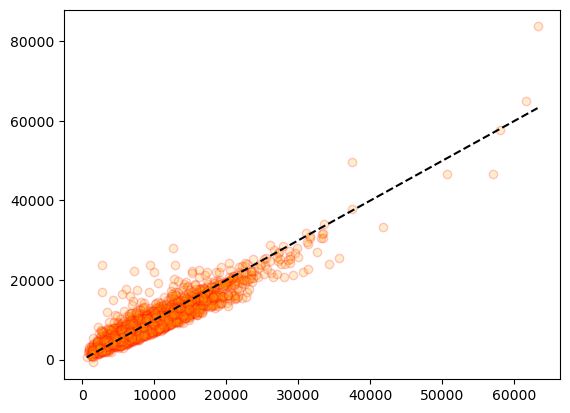

In [17]:
import matplotlib.pyplot as plt

pipe.fit(X_train, y_train)
prediction = pipe.predict(X_train)
get_evaluation(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

MSE: 5320777.4034, RMSE: 2306.6810, R2: 0.8679


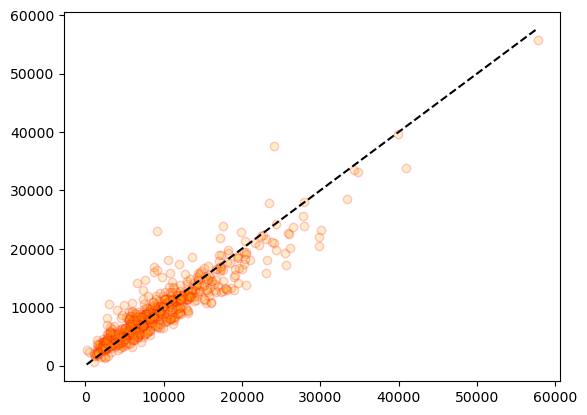

In [18]:
import matplotlib.pyplot as plt

pipe.fit(X_train, y_train)
prediction = pipe.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

### **📌결론**